In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.animation as animation
import pandas as pd
from PIL import Image
from glob import glob
import os

pd.set_option('display.max_rows', 500)

name_mapping = {
    "v3.1": "1",
    "v3.2": "2",
    "v3.3": "3",
    "v3.4": "4",
    "cam": "5",
    "wroom": "7",
    "wroom2":  "6",
    "wroom3": "13",
    "lyra1": "15",
    "lyra2": "16",
}

def translate_name(name):
    if name in name_mapping:
        return name_mapping[name]
    else:
        return name
    

def get_device_name_from_path(path):
    file_name = os.path.basename(path).split("_")[0]
    return translate_name(file_name)

def get_temp_from_path(path):
    parent_dir = os.path.split(os.path.dirname(path))[-1]
    sign = '-' if parent_dir.split("_")[0] == "minus" else ''
    return sign + parent_dir.split("_")[1]
    

def get_x_axis_from_path(path):
    file_name = os.path.basename(path)
    start = int(file_name.split("_")[3])
    end = int(file_name.split("_")[4])
    step = int(file_name.split("_")[5])
    return np.arange(start, end, step)


def load_data(path, bits=True):
    data = np.fromfile(path, dtype='uint8')
    if bits:
        data = np.unpackbits(data)
    return data


def plot_file(path):
    data = load_data(path)
    data = data[:4096*8]
    data = data.reshape(128, -1)
    plt.imshow(data, interpolation="none",cmap='binary')
    

def get_hamming_weights(data):
    data = data.reshape((-1, 4096*8)) # we have 4kB readings
    weights = []
    for reading in data:
        weights.append(reading.sum()/reading.size)
    return np.asarray(weights)*100
    

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def same_rows(arr):
    return (arr == arr[0]).all()

def puf_errors(puf_responses):
    return puf_responses.shape[0] - maxo(np.unique(puf_responses, axis=0, return_counts=True)[1])

# PUF response reliability test:

In [9]:
measurements = glob("data/data_third/*/*_puf_response_both_1000_100000.bin")

names = []
temps = []
errors = []

for measurement in measurements:
    data = load_data(measurement)
    data = data.reshape((100, -1))
    temps.append(int(get_temp_from_path(measurement)))
    names.append(get_device_name_from_path(measurement))
    errors.append(puf_errors(data))
    
df = pd.DataFrame(data={"names": names, "temps": temps, "errors": errors})
df = df.sort_values(by=["temps"])
display(df)

names  temps  errors
38     12    -40       1
47      7    -40       0
46      6    -40       0
45      4    -40      15
44      3    -40       1
43      2    -40       0
42      1    -40       1
41    cam    -40       0
40      9    -40       0
39      8    -40       0
37     11    -40      10
36     10    -40      20
26     12    -30       0
27      8    -30       0
28      9    -30       0
29    cam    -30       0
32      3    -30       0
31      2    -30       0
33      4    -30       0
25     11    -30       1
30      1    -30       0
24     10    -30       0
35      7    -30       0
34      6    -30       0
23      7    -20       0
21      4    -20       0
20      3    -20       0
19      2    -20       0
18      1    -20       0
16      9    -20       0
15      8    -20       0
14     12    -20       0
13     11    -20       0
12     10    -20       0
22      6    -20       0
17    cam    -20       0
0      10    -10       0
11      7    -10       0
1      11    -10       0
2      12    -10       0
4       9    -10       0
5     cam    -10       0
3       8    -10       0
7       2    -10       0
8       3    -10       0
9       4    -10       0
10      6    -10       0
6       1    -10       0
55      3      0       0
59     10      0       0
58      7      0       0
57      6      0       0
56      4      0       0
54      2      0       0
50      9      0       0
52     12      0       0
51    cam      0       0
49      8      0       0
48     11      0       0
53      1      0       0
67      2     10       0
70      6     10       0
69      4     10       0
68      3     10       0
66      1     10       0
71      7     10       0
64      9     10       0
63      8     10       0
62     12     10       0
61     11     10       0
60     10     10       0
65    cam     10       0
82      6     20       0
81      4     20       0
80      3     20       0
79      2     20       0
78      1     20       0
83      7     20       0
76      9     20       0
75      8     20       0
74     12     20       0
73     11     20       0
72     10     20       0
77    cam     20       0
95      7     30       0
94      6     30       0
93      4     30       0
92      3     30       0
91      2     30       0
90      1     30       0
89    cam     30       0
87      8     30       0
86     12     30       0
85     11     30       0
84     10     30       0
88      9     30       0
103     2     40       0
106     6     40       0
105     4     40       0
107     7     40       0
102     1     40       0
104     3     40       0
100     9     40       0
99      8     40       0
98     12     40       0
97     11     40       0
96     10     40       0
101   cam     40       0
119     7     50       0
118     6     50       0
117     4     50       0
116     3     50       0
115     2     50       0
114     1     50       0
113   cam     50       0
112     9     50       0
111     8     50       0
110    11     50       0
109    12     50       0
108    10     50       0
130     6     60       0
129     4     60       0
131     7     60       0
128     3     60       0
127     2     60       0
126     1     60       0
122    12     60       0
124     9     60       0
123     8     60       0
121    11     60       0
120    10     60       0
125   cam     60       0
141     4     70       0
140     3     70       0
139     2     70       0
138     1     70       0
137   cam     70       0
135     8     70       0
134    12     70       0
133    11     70       0
132    10     70       0
142     6     70       0
136     9     70       0
143     7     70       0

# PUF response error correction data
## todo FIX BAD ERROR CALCULATION - PRINT PERCENT DATA FROM BOARD
## include ESP32-s2 and c3 data

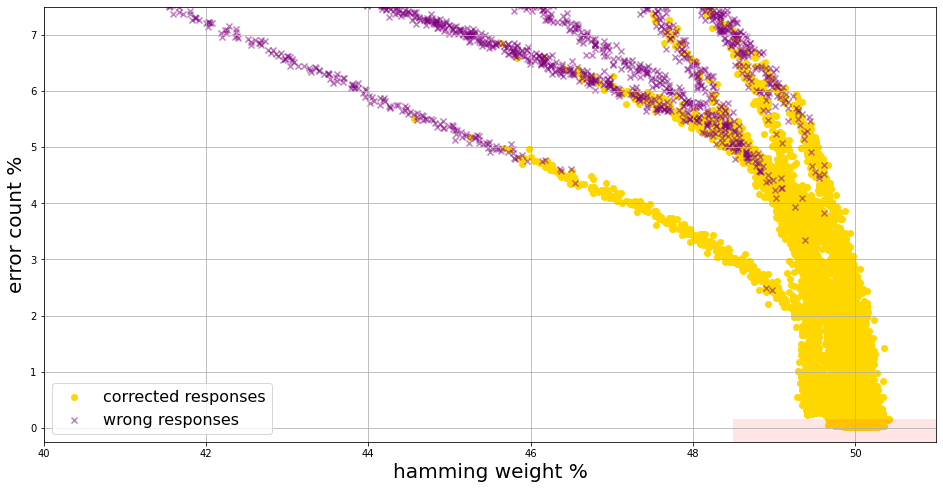

In [29]:
plt.figure(figsize=(16, 8))

# TODO cam and wroom2 need to correct for error data by mask hw

board_data = [
    pd.read_csv("data/puf_ecc_data/v3.1_error_data.csv"),
    pd.read_csv("data/puf_ecc_data/v3.2_error_data.csv"),
    pd.read_csv("data/puf_ecc_data/v3.3_error_data.csv"),
    pd.read_csv("data/puf_ecc_data/v3.4_error_data.csv"),
]
data = pd.concat(board_data)
data = data.rename(columns=lambda x: x.strip())
data["error_count"] = 100 * data["error_count"]
data["hw_raw"] = 100 * data["hw_raw"]

board_data_old = [
    pd.read_csv("data/puf_ecc_data/cam_error_data.csv"),
    pd.read_csv("data/puf_ecc_data/wroom2_error_data.csv"),
]
data_old = pd.concat(board_data_old)
data_old = data_old.rename(columns=lambda x: x.strip())
data_old["hw_raw"] = 100 * data_old["hw_raw"]
data_old["error_count"] = (100 * data_old["error_count"]/(4096*8))/.7223

data = pd.concat([data_old, data])
#data = data[data["error_count"] < 7.5]

# correct
correct = data[data["correct_response"] == 1]
x = correct["hw_raw"]
y = correct["error_count"]
correct_plt = plt.scatter(x, y, c="gold", alpha = 1, marker='o')

# not corrected
wrong = data[data["correct_response"] == 0]
x = wrong["hw_raw"]
y = wrong["error_count"]
wrong_plt = plt.scatter(x, y, c="purple", alpha = .5, marker='x')

left, bottom, width, height = (48.5, -1, 2.5, 1.15)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect)

plt.legend((correct_plt, wrong_plt), ("corrected responses", "wrong responses"), fontsize=16, loc="lower left")
plt.ylabel("error count %", fontsize=20)
plt.xlabel("hamming weight %", fontsize=20)
plt.grid(True, axis='both')
plt.ylim([-0.25, 7.5])
plt.xlim([40, 51])
#plt.savefig("correct_responses_plot.png", dpi=300)
plt.show()

# Sleep time plots:

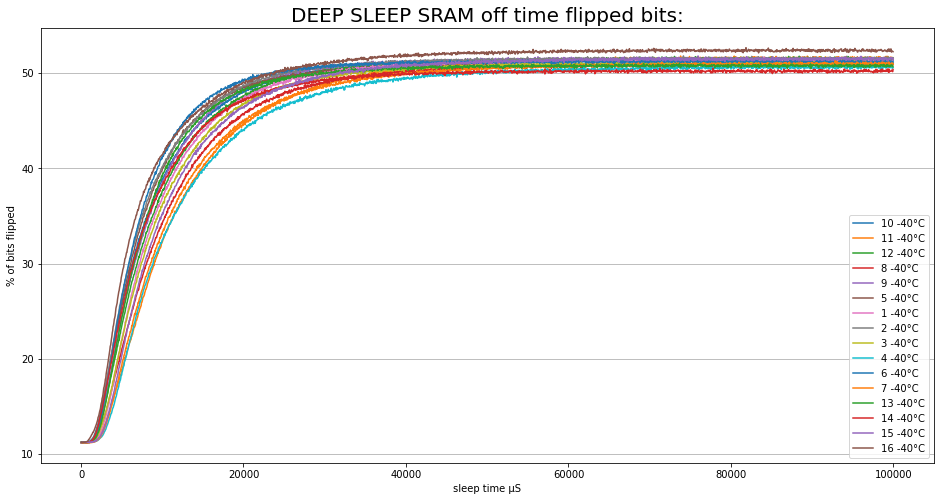

In [4]:
plt.figure(figsize=(16, 8))
#plt.gcf().set_facecolor('white')

measurements = glob("data/data_third/minus_40/*_sram_deepsleep_0_100000_50_0.bin")

for measurement in measurements:
    data = load_data(measurement)
    weights = get_hamming_weights(data)
    x = get_x_axis_from_path(measurement)
    plt.plot(x[1:], weights[1:], 
             label=get_device_name_from_path(measurement) + " " + get_temp_from_path(measurement) + "°C")


plt.ylabel("% of bits flipped")
plt.xlabel("sleep time μS")
plt.grid(True, axis='y')
plt.title("DEEP SLEEP SRAM off time flipped bits:", fontsize=20)
plt.legend()
plt.show()

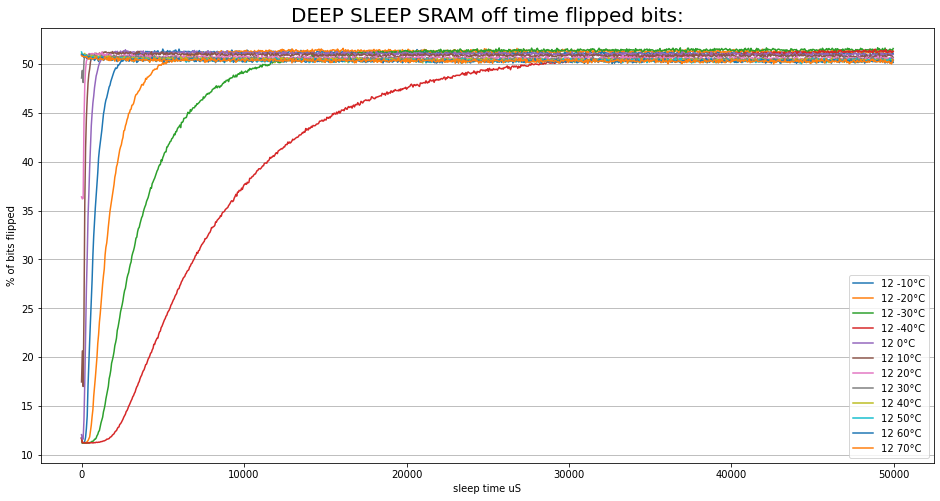

In [5]:
plt.figure(figsize=(16, 8))
#plt.gcf().set_facecolor('white')

measurements = glob("data/data_third/*/12_sram_deepsleep_0_100000_50_0.bin")

for measurement in measurements:
    data = load_data(measurement)
    weights = get_hamming_weights(data)
    x = get_x_axis_from_path(measurement)
    plt.plot(x[:1000], weights[:1000], 
             label=get_device_name_from_path(measurement) + " " + get_temp_from_path(measurement) + "°C")


plt.ylabel("% of bits flipped")
plt.xlabel("sleep time μS")
plt.grid(True, axis='y')
plt.title("DEEP SLEEP SRAM off time flipped bits:", fontsize=20)
plt.legend()
plt.show()

# TODO redo sram_sleep measurement with less step

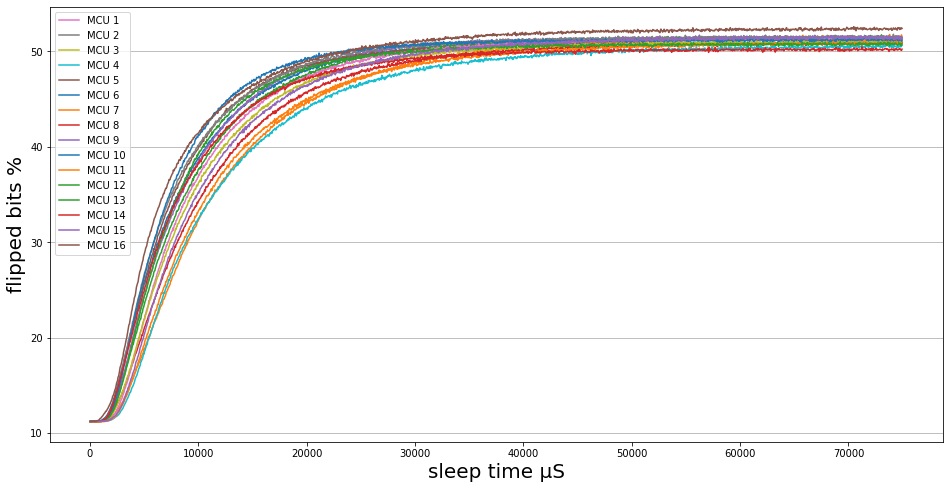

In [12]:
plt.figure(figsize=(16, 8))
#plt.gcf().set_facecolor('white')

measurements = glob("data/data_third/minus_40/*_sram_deepsleep_0_100000_50_0.bin")

for measurement in measurements:
    data = load_data(measurement)
    weights = get_hamming_weights(data)
    x = get_x_axis_from_path(measurement)
    plt.plot(x[1:1500], weights[1:1500], 
             label="MCU " + get_device_name_from_path(measurement))


plt.ylabel("flipped bits %", fontsize=20)
plt.xlabel("sleep time μS", fontsize=20)
plt.grid(True, axis='y')

handles, labels = plt.gca().get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0].split(' ')[1])))
plt.legend(handles, labels)

#plt.title("SRAM off time flipped bits:", fontsize=20)

plt.savefig("all_minus_40_deep_sleep.png", dpi=300)
plt.show()

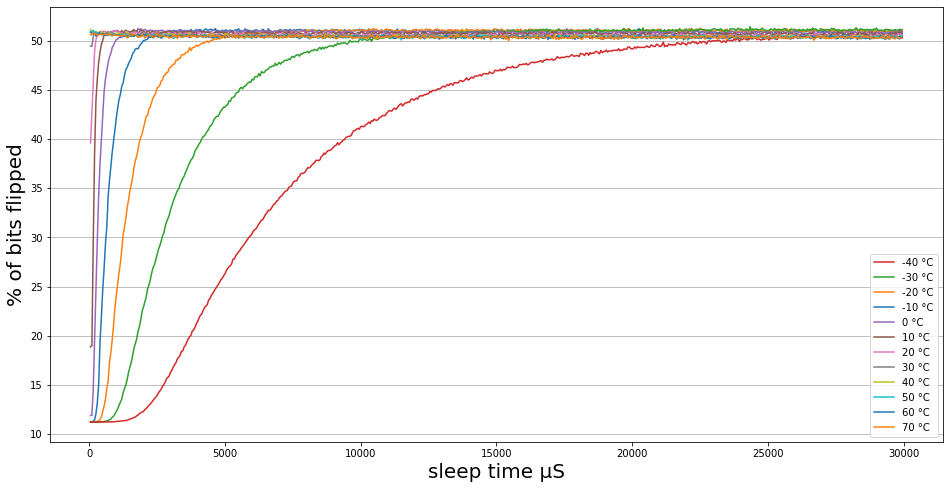

In [22]:
plt.figure(figsize=(16, 8))
#plt.gcf().set_facecolor('white')

measurements = glob("data/data_third/*/wroom2_sram_deepsleep_0_100000_50_0.bin")

for measurement in measurements:
#    if int(get_temp_from_path(measurement)) > 20:
#        continue
    data = load_data(measurement)
    weights = get_hamming_weights(data)
    x = get_x_axis_from_path(measurement)
    plt.plot(x[1:600], weights[1:600], 
             label=get_temp_from_path(measurement) + " °C")

    



plt.ylabel("% of bits flipped", fontsize=20)
plt.xlabel("sleep time μS", fontsize=20)
plt.grid(True, axis='y')

handles, labels = plt.gca().get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0].split(' ')[0])))
plt.legend(handles, labels)

plt.savefig("6_across_temps_deep_sleep.png", dpi=300)
plt.show()

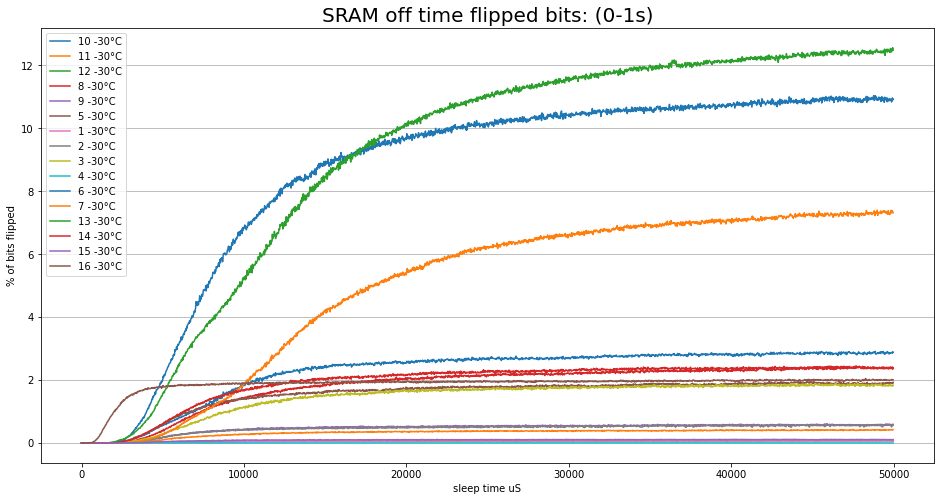

In [7]:
plt.figure(figsize=(16, 8))

# !!!different pattern with 0x00 and 0xFF memory!!!
measurements = glob("data/data_third/minus_30/*_sram_sleep_0_50000_25_0.bin")

for measurement in measurements:
    data = load_data(measurement)
    weights = get_hamming_weights(data)
    x = get_x_axis_from_path(measurement)
    plt.plot(x, weights, label=get_device_name_from_path(measurement) + " " + get_temp_from_path(measurement) + "°C")


plt.ylabel("% of bits flipped")
plt.xlabel("sleep time uS")
plt.grid(True, axis='y')
plt.title("SRAM off time flipped bits: (0-1s)", fontsize=20)
plt.legend()
plt.show()

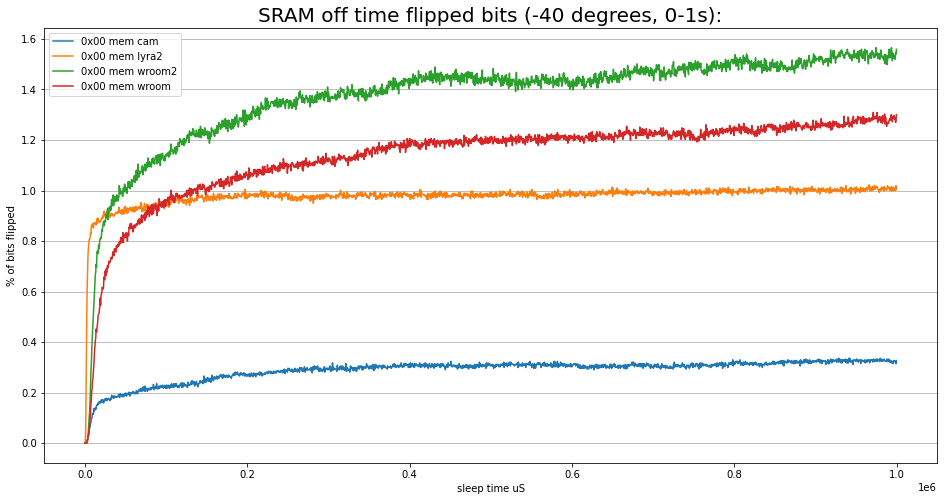

In [8]:
plt.figure(figsize=(16, 8))

measurements = glob("data/minus_40/*_sram_sleep_0_1000000_500_0.bin")

for measurement in measurements:
    data = load_data(measurement)
    weights = get_hamming_weights(data)
    x = get_x_axis_from_path(measurement)
    plt.plot(x, weights, label="0x00 mem " + get_device_name_from_path(measurement))


plt.ylabel("% of bits flipped")
plt.xlabel("sleep time uS")
plt.grid(True, axis='y')
plt.title("SRAM off time flipped bits (-40 degrees, 0-1s):", fontsize=20)
plt.legend()
plt.show()

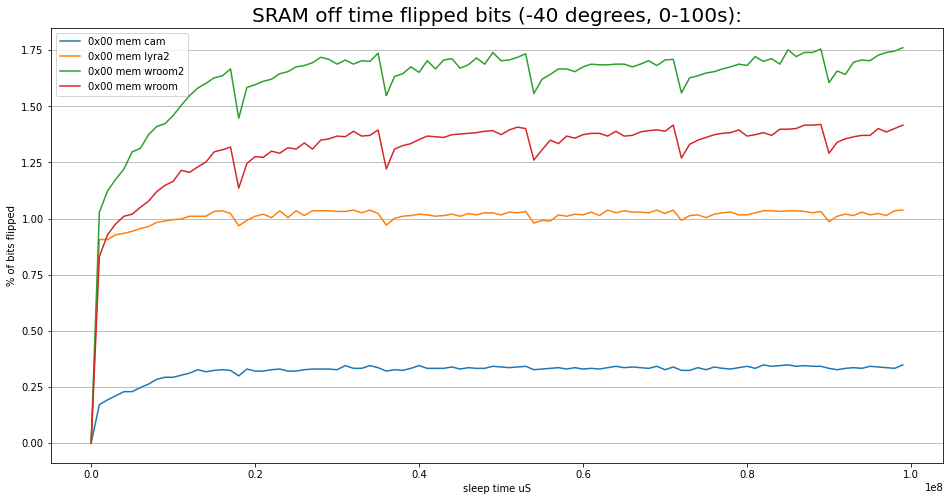

In [9]:
plt.figure(figsize=(16, 8))

measurements = glob("data/minus_40/*_sram_sleep_0_100000000_1000000_0.bin")

for measurement in measurements:
    data = load_data(measurement)
    weights = get_hamming_weights(data)
    x = get_x_axis_from_path(measurement)
    plt.plot(x, weights, label="0x00 mem " + get_device_name_from_path(measurement))


plt.ylabel("% of bits flipped")
plt.xlabel("sleep time uS")
plt.grid(True, axis='y')
plt.title("SRAM off time flipped bits (-40 degrees, 0-100s):", fontsize=20)
plt.legend()
plt.show()

# Response bits plots:

#### Compare *truly* random data to PUF response :

32768000


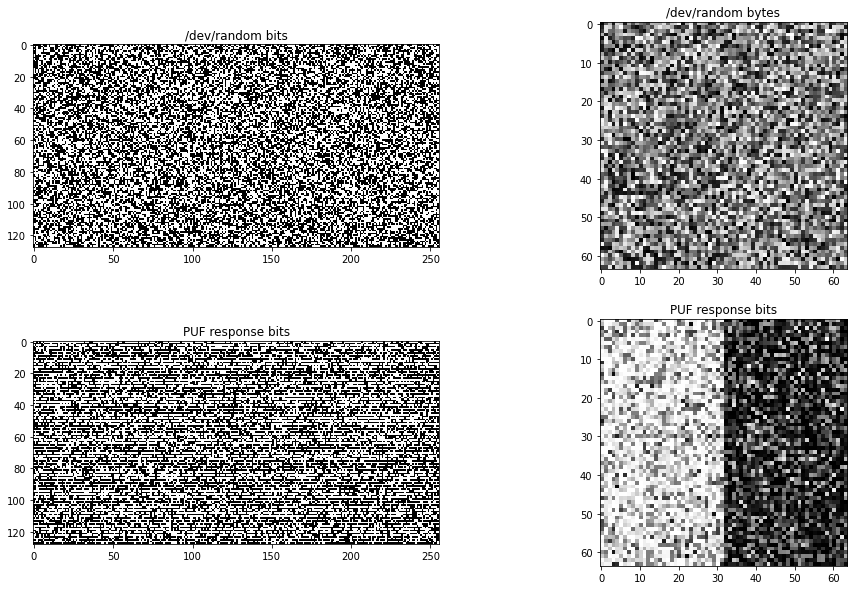

In [10]:
# /dev/random bits
image = load_data("data/random_test.bin")
print(image.size)
image = image[:4096*8]
image = image.reshape(128, -1)
plt.figure(figsize=(16, 10)) 
plt.subplot(2,2,1)
plt.title("/dev/random bits")
plt.imshow(image, interpolation="none",cmap='binary')

# /dev/random bytes
image = load_data("data/random_test.bin", False)
image = image[:4096]
image = image.reshape(64, -1)
plt.subplot(2,2,2)
plt.title("/dev/random bytes")
plt.imshow(image, interpolation="none",cmap='binary')

# PUF response bits
image = load_data("../evaluation/data/lyra2_puf_response_1000")
image = image[:4096*8]
image = image.reshape(128, -1)
plt.subplot(2,2,3)
plt.title("PUF response bits")
plt.imshow(image, interpolation="none",cmap='binary')

# PUF response bytes
image = load_data("../evaluation/data/lyra2_puf_response_1000", False)
image = image[:4096]
image = image.reshape(64, -1)
plt.subplot(2,2,4)
plt.title("PUF response bits")
plt.imshow(image, interpolation="none",cmap='binary')


#### Show n-th reading as a bitmap:

Hamming weight: 49.700927734375%


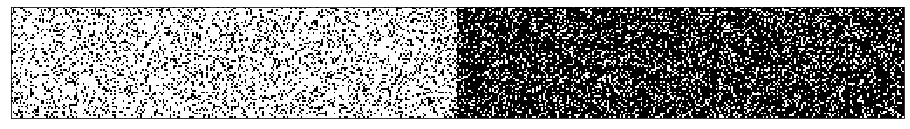

In [7]:
n = 999
data = load_data("data/data_third/plus_20/lyra2_puf_response_raw_1000_100000.bin")
#data = data_ff = load_data("data/batman_0_sleep.bin")

image = data[4096*8*n:4096*8*(n+1)]
print("Hamming weight: ", (image.sum()/image.size)*100, "%", sep='')
image = image.reshape(-1, 256*2)
plt.figure(figsize=(16, 8)) 
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(image, interpolation="none",cmap='binary')

#### Compare boards:

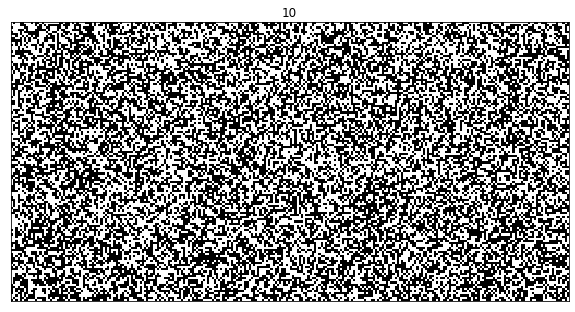

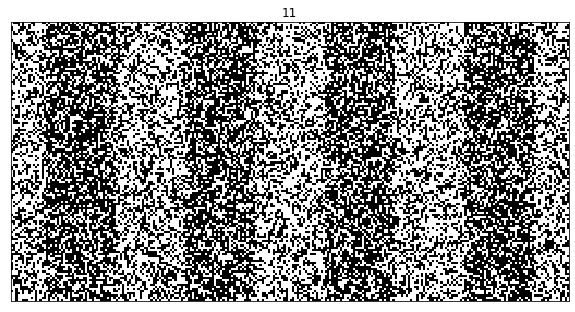

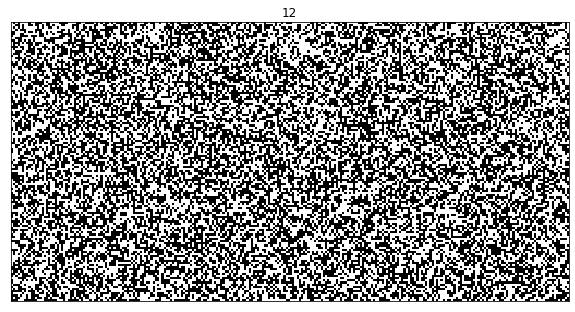

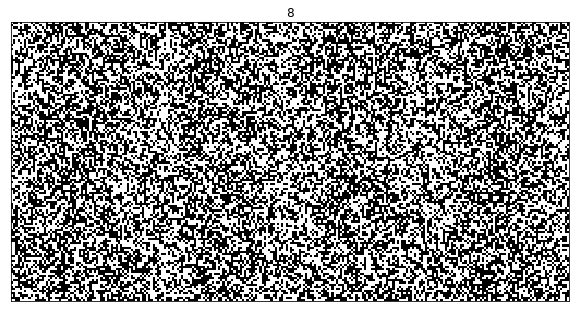

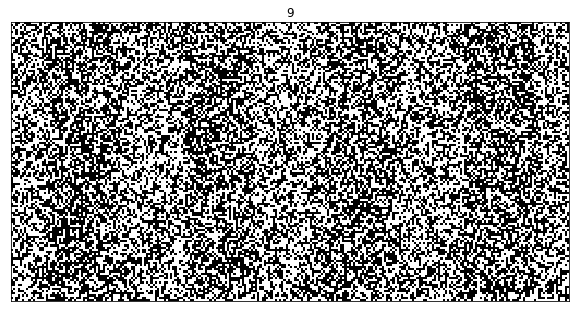

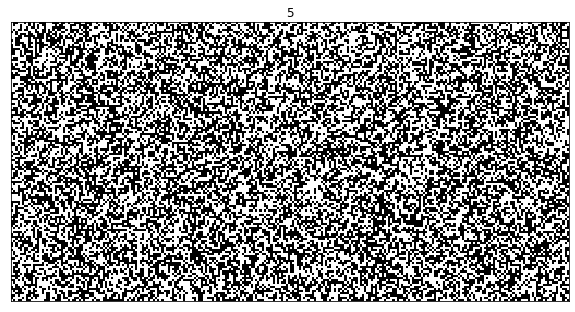

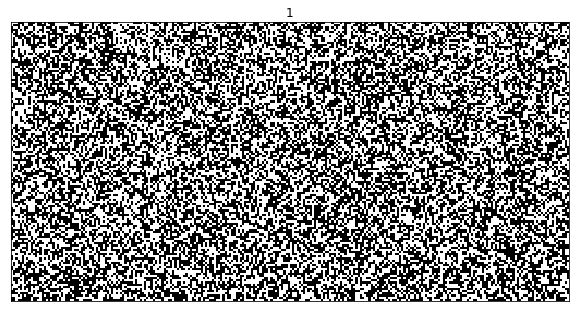

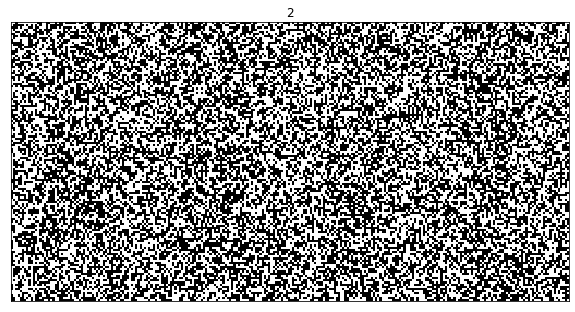

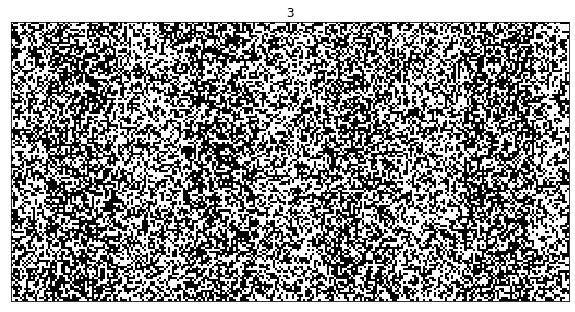

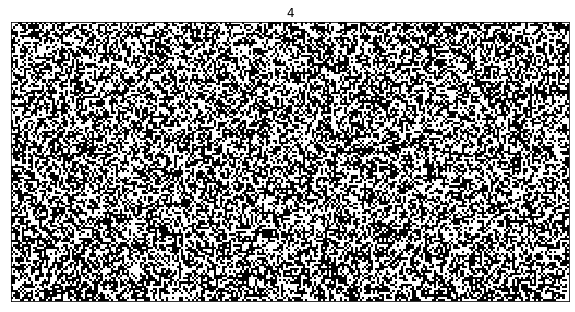

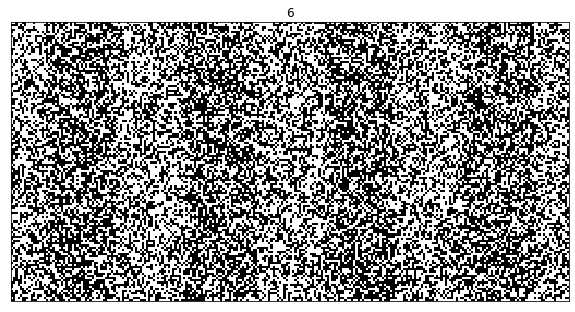

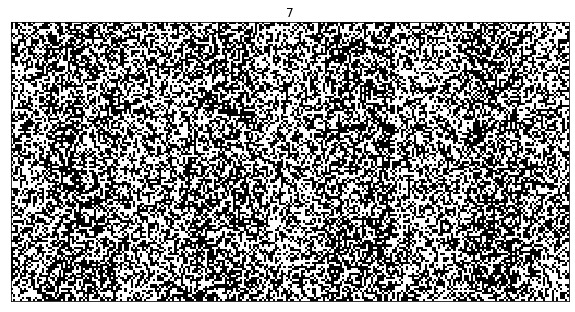

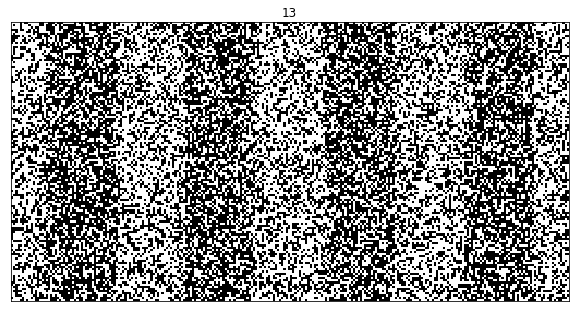

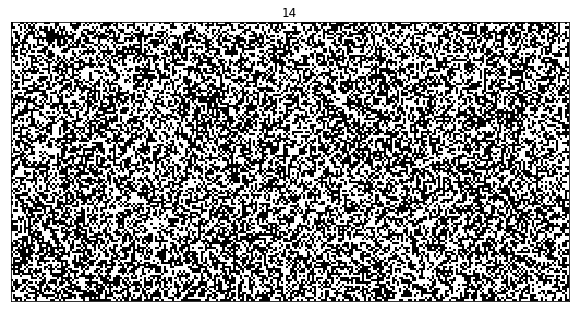

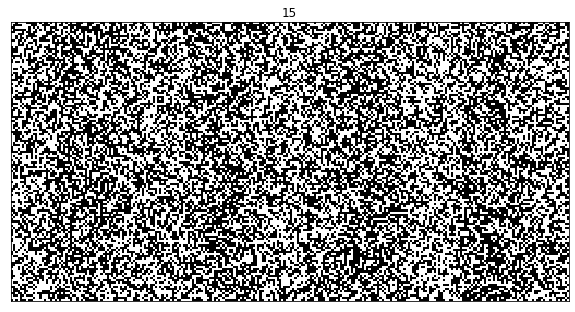

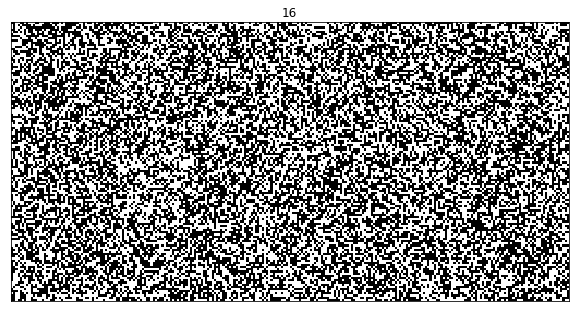

In [25]:
measurements = glob("data/data_third/plus_20/*_pufsleep_response_raw_1000_100000.bin")

for measurement in measurements:
    image = load_data(measurement)
    image = image[:4096*8]
    image = image.reshape(128, -1)
    plt.figure(figsize=(10, 6)) 
    plt.title(get_device_name_from_path(measurement))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(image, interpolation="none",cmap='binary')


#### Every 4 bytes there changes a preference for 0 or 1 state (the same for instruction or data part of SRAM):

stripe HW: 37.5%
stripe HW: 61.279296875%
whole  HW: 49.4171142578125%


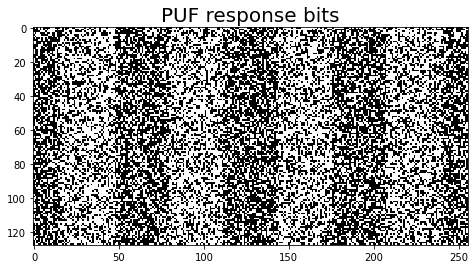

In [18]:
aspect_ratio = 256,128


image = load_data("../evaluation/data/wroom3_puf_response_1000")

image = image[:4096*8]
image = image[:aspect_ratio[0]*aspect_ratio[1]]
image = image.reshape(aspect_ratio[1], aspect_ratio[0])
plt.figure(figsize=(10, 4)) 
plt.title("PUF response bits", fontsize=20)
plt.imshow(image, interpolation="none",cmap='binary')

n = 2
ff_stripe = image[0:,16+64*n:16+64*n+32]
zero_stripe = image[0:,48+64*n:48+64*n+32]
print("stripe HW: ", (ff_stripe.sum()/ff_stripe.size)*100, "%", sep='')
print("stripe HW: ", (zero_stripe.sum()/zero_stripe.size)*100, "%", sep='')
print("whole  HW: ", (image.sum()/image.size)*100, "%", sep='')


### Unstable bits:

Stable bits: 69.134521484375%


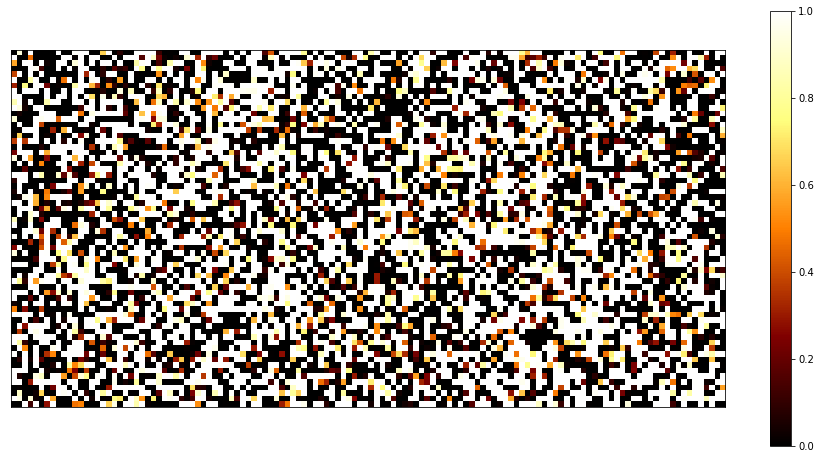

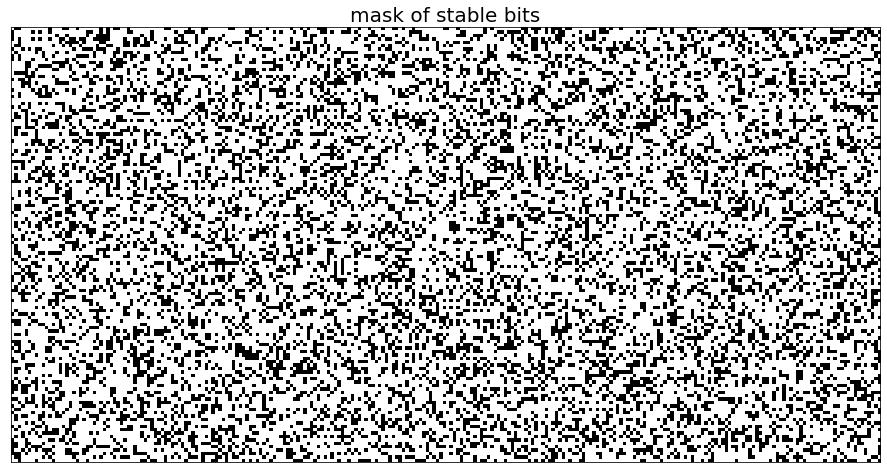

In [12]:
def get_mask(puf_responses):
    mean = puf_responses.mean(0)
    stable_ones = np.where(mean == 1 , 1, 0).astype(np.uint8)
    stable_zeros = np.where(mean == 0, 1, 0).astype(np.uint8)
    return stable_ones | stable_zeros

puf_responses = load_data("data/data_third/plus_20/12_pufsleep_response_raw_1000_100000.bin").reshape((-1, 4096*8))

image = puf_responses.mean(0)
image = image[:128*64].reshape(64,128)

plt.figure(figsize=(16,8)) 
#plt.title("Bits average value over measurements", fontsize=20)
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(image, interpolation="none",cmap='afmhot')
plt.colorbar()
plt.savefig("stable_mask.png", dpi=300)

mask = get_mask(puf_responses)
image = mask.reshape((128,256))
plt.figure(figsize=(16, 8))
plt.xticks([], [])
plt.yticks([], [])
plt.title("mask of stable bits", fontsize=20)
plt.imshow(image, interpolation="none",cmap='bone')

print("Stable bits: ",(mask.sum()/mask.size)*100, "%", sep='')